In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [3]:
loo = LeaveOneOut()
loo_scores = [] 

Leave-One-Out CV Accuracy: 89.08748824082785 %
Precision (macro) = 0.812836369979227
Recall (macro) = 0.7684119537843487
F1-score (macro) = 0.788459278406424
*******************


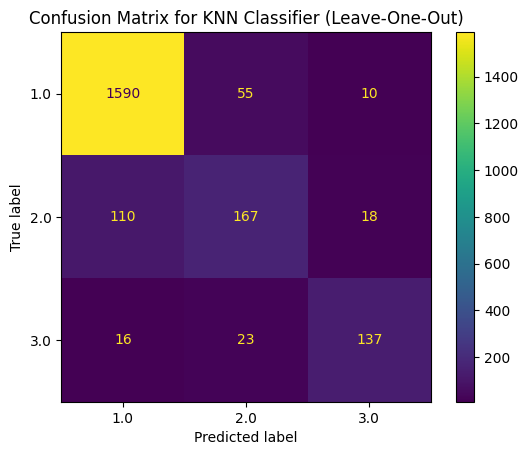

Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94      1655
         2.0       0.68      0.57      0.62       295
         3.0       0.83      0.78      0.80       176

    accuracy                           0.89      2126
   macro avg       0.81      0.77      0.79      2126
weighted avg       0.88      0.89      0.89      2126



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

svm_classifier = SVC(kernel='linear')  

svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
loo_scores.append(y_pred[0] == y_test[0])


# Print accuracy
accuracy = accuracy_score(y, svm_classifier.predict(X))

precision = precision_score(y, svm_classifier.predict(X), average='macro')
recall = recall_score(y, svm_classifier.predict(X), average='macro')
f1 = f1_score(y, svm_classifier.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, svm_classifier.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for KNN Classifier (Leave-One-Out)')
plt.show()
class_report = classification_report(y, svm_classifier.predict(X))
print("Classification Report:")
print(class_report)




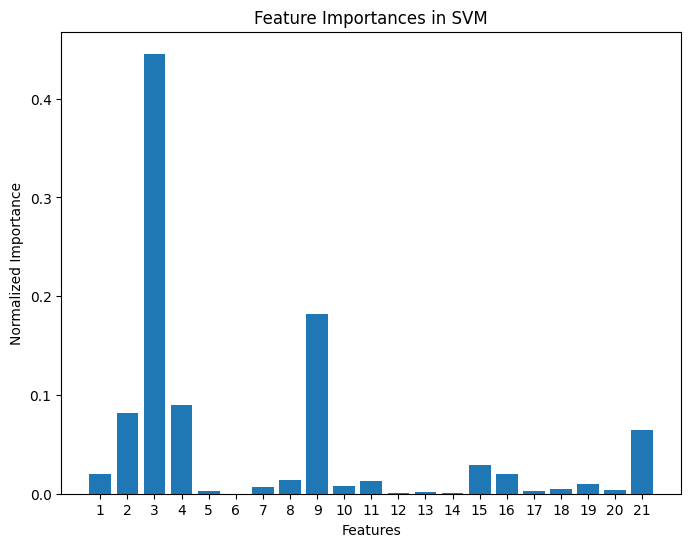

In [5]:
feature_importances = np.abs(svm_classifier.coef_)[0]

feature_importances /= np.sum(feature_importances)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(feature_importances) + 1), feature_importances)
plt.title("Feature Importances in SVM")
plt.xlabel("Features")
plt.ylabel("Normalized Importance")
plt.xticks(range(1, len(feature_importances) + 1))  # Set x-axis ticks to be feature numbers
plt.show()


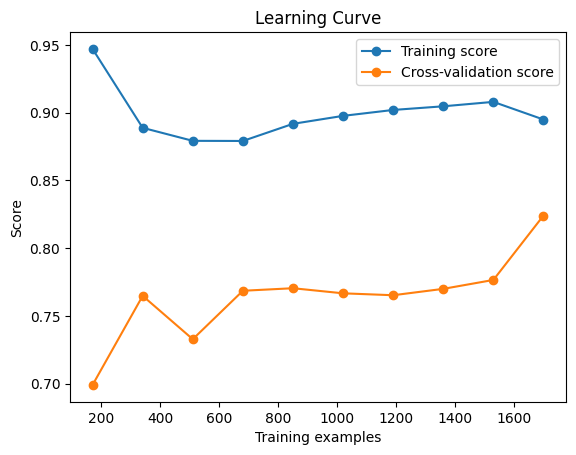

In [6]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()